In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

ios_data = pd.read_csv('Resources/applestore.csv')
android_data = pd.read_csv('Resources/googleplaystore.csv')
ios_data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [21]:
list(ios_data)

['Unnamed: 0',
 'id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'ver',
 'cont_rating',
 'prime_genre',
 'sup_devices.num',
 'ipadSc_urls.num',
 'lang.num',
 'vpp_lic',
 'paidorfree',
 'broad_genre']

In [22]:
ios_data["prime_genre"].value_counts()

Games                3862
Entertainment         535
Education             453
Photo & Video         349
Utilities             248
Health & Fitness      180
Productivity          178
Social Networking     167
Lifestyle             144
Music                 138
Shopping              122
Sports                114
Book                  112
Finance               104
Travel                 81
News                   75
Weather                72
Reference              64
Food & Drink           63
Business               57
Navigation             46
Medical                23
Catalogs               10
Name: prime_genre, dtype: int64

In [19]:
app_summary = pd.DataFrame({"Total App": len(ios_data["track_name"].unique()),
                              "Total Reviews": ios_data["rating_count_tot"].sum(),
                              "Total Genre": len(ios_data["prime_genre"].unique())
                              },index=["App Summary"])
app_summary



,Total App,Total Reviews,Total Genre
App Summary,7195,92790253,23


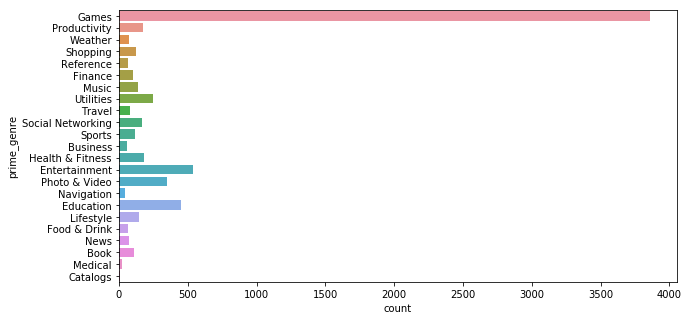

In [2]:
plt.figure(figsize=(10,5))
sns.countplot(y= ios_data["prime_genre"])

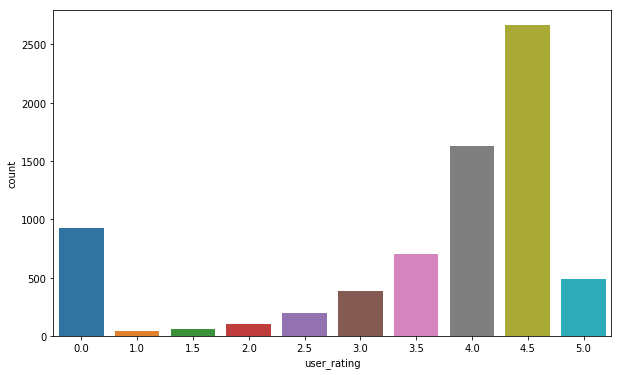

In [3]:
plt.figure(figsize=(10,6))
sns.countplot(ios_data["user_rating"])

/anaconda3/envs/pythondata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


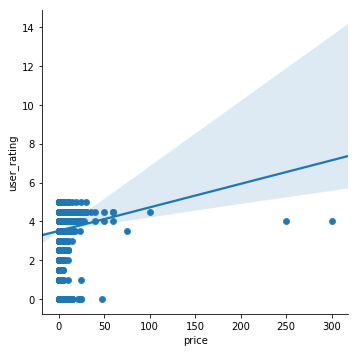

In [5]:
sns.relplot(x= "price",y="user_rating", data=ios_data)
sns.regplot(x="price", y="user_rating", data=ios_data)

/anaconda3/envs/pythondata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


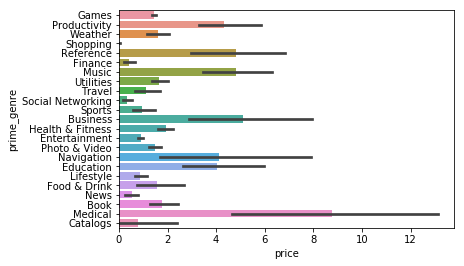

In [7]:
sns.barplot(x="price", y="prime_genre", data=ios_data)

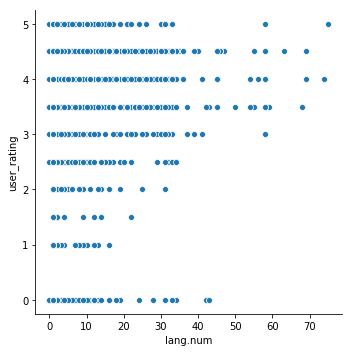

In [9]:
sns.relplot(x= "lang.num",y="user_rating", data=ios_data)

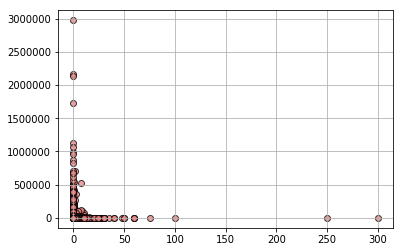

In [10]:
plt.scatter(ios_data["price"], ios_data["rating_count_tot"], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
#plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

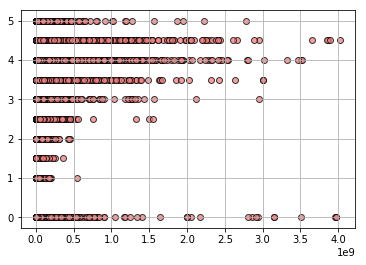

In [11]:
plt.scatter(ios_data["size_bytes"], ios_data["user_rating"], marker="o", facecolors="lightcoral", edgecolors="black", alpha=0.75)
#plt.title("City Latitude vs. Cloudiness ("+time.strftime("%d/%m/%Y")+")")
#plt.xlabel("Latitude")
#plt.ylabel("Cloudiness (%)")
#plt.savefig("output_data/CityLatitudeVsCloudiness.png")
plt.grid(True)
plt.show()

In [14]:
def paid(x):
    if x>0:
        return 'Paid'
    else :
        return'Free'

ios_data['paidorfree']= ios_data.price.apply(lambda x : paid(x))

In [16]:
s = ios_data.prime_genre.value_counts().index[:4]
def categ(x):
    if x in s:
        return x
    else : 
        return "Others"

ios_data['broad_genre']= ios_data.prime_genre.apply(lambda x : categ(x))
ios_data.head(5)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,paidorfree,broad_genre
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1,Paid,Games
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1,Free,Others
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1,Free,Others
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1,Free,Others
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1,Free,Others


/anaconda3/envs/pythondata/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


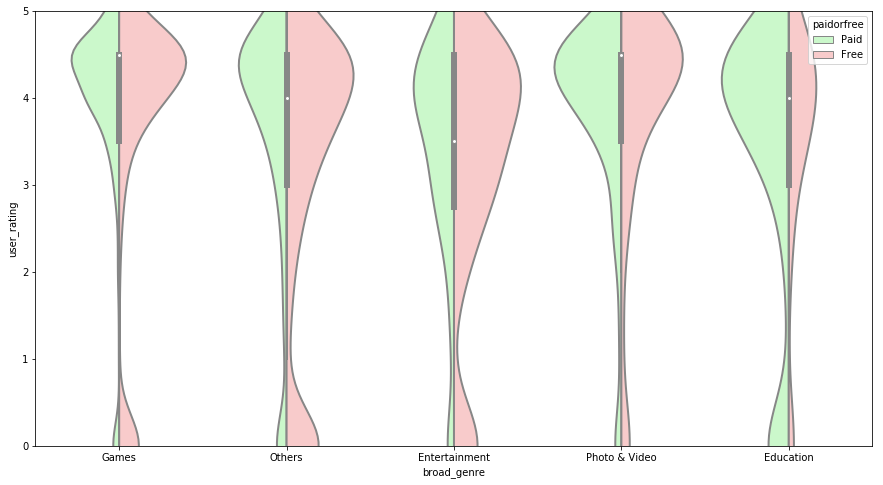

In [17]:
plt.figure(figsize=(15,8))
plt.style.use('fast')
plt.ylim([0,5])
sns.violinplot(data=ios_data, y ='user_rating',x='broad_genre',hue='paidorfree',
               vertical=True,kde=False,split=True ,linewidth=2,
               scale ='count', palette=['#c4ffc4','#ffc4c4'])

In [26]:
ratings = ios_data.loc[:,["track_name","prime_genre","user_rating","rating_count_tot","price"]]
ratings = ratings.sort_values(by=["user_rating","rating_count_tot"],ascending=False)
ratings.head()

,track_name,prime_genre,user_rating,rating_count_tot,price
1104,Head Soccer,Games,5.0,481564,0.00
302,Plants vs. Zombies,Games,5.0,426463,0.99
3086,Sniper 3D Assassin: Shoot to Kill Gun Game,Games,5.0,386521,0.00
2177,Geometry Dash Lite,Games,5.0,370370,0.00
498,Infinity Blade,Games,5.0,326482,0.99


In [27]:
top_free_apps = ratings[(ratings["price"]==0)]
top_paid_apps = ratings[(ratings["price"]!=0)]
top_free_apps_10 = top_free_apps.head(10)
top_paid_apps_10 = top_paid_apps.head(10)

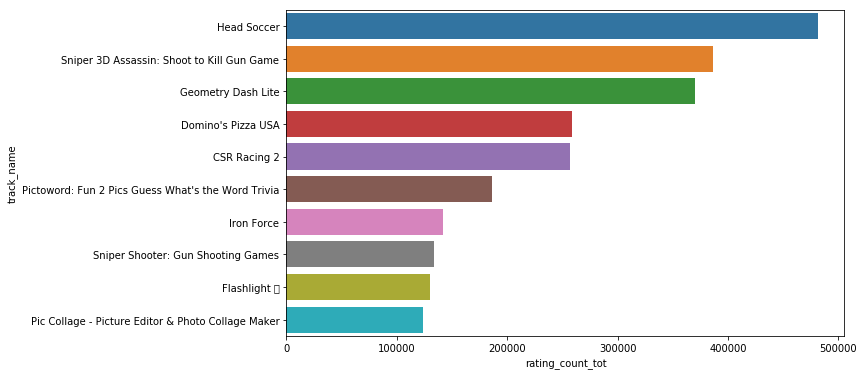

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x= "rating_count_tot", y="track_name", data=top_free_apps_10)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

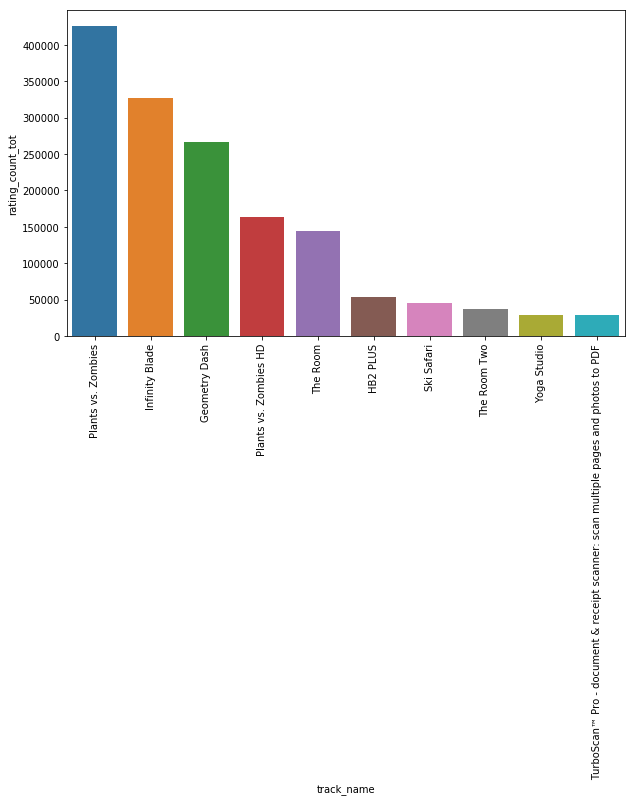

In [32]:
plt.figure(figsize=(10,6))
sns.barplot(x= "track_name", y="rating_count_tot", data=top_paid_apps_10,)
plt.xticks(rotation='vertical')